In [1]:
# use print only as a function
from __future__ import print_function
import sys
#sys.version_info
#pd.show_versions()  ## This will show all of the installed packages

In [2]:
__author__ = 'swe03'

import argparse

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import matplotlib.pyplot as pplt
from decimal import *

%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

from statsmodels.graphics.api import qqplot

from scipy import stats

desired_width = 400
pd.set_option('display.width',desired_width)

In [3]:
#!pip install seaborn

In [4]:
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
import statsmodels.tsa as tsa
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
#!pip install pandasql
from pandasql import PandaSQL 
pdsql = PandaSQL()

##### Read the BQ tables created in the Dst Addr and Port profile 1 or Iterate and Create ADS's 1 programs

In [6]:
#!pip install google-api-python-client
ent_calc_df1 = pd.read_gbq("select * from prod.calc_ent2_3_all", project_id="network-sec-analytics")
#ent_calc_df1[250:310]

Requesting query... ok.
Query running...
Query done.
Processed: 32.5 kb

Retrieving results...
Got 336 rows.

Total time taken 1.59 s.
Finished at 2017-05-02 17:20:16.


In [7]:
# Need a new Feature created since we repurpose date_hour as Index below
ent_calc_df1['Date_Hour'] = ent_calc_df1['date_hour']
#p53_ts

In [8]:
#Need an Index for the Seasonal Decompostion below
ent_calc_df1.reset_index(inplace=True)
ent_calc_df1 = ent_calc_df1.set_index('Date_Hour')
#ent_calc_df1.index.dtype      # Note in the output:dtype('<M8[ns]') but...  np.dtype('datetime64[ns]') = np.dtype('<M8[ns]'):

In [9]:
ent_calc_df1=ent_calc_df1.sort_values(['date_hour'],ascending=True)
#ent_calc_df1.reset_index(inplace=True)
#ent_calc_df1[250:364]
ent_calc_df1

,index,date_hour,dst_addr_datehour_group,total_dst_addr_cnt,ent1,ln_ent1,hx_ent,unq_dst_host_count,unq_src_dst_addr_cnt,In_degree_entropy
Date_Hour,,,,,,,,,,
2017-02-05 00:00:00.000000,192,2017-02-05 00:00:00.000000,2017-02-05 00,10,0.100000,-2.302585,-0.874034,3,5,0.795580
2017-02-05 01:00:00.000000,115,2017-02-05 01:00:00.000000,2017-02-05 01,7,0.285714,-1.252763,-0.993852,3,5,0.904643
2017-02-05 02:00:00.000000,233,2017-02-05 02:00:00.000000,2017-02-05 02,10,0.200000,-1.609438,-0.965663,3,6,0.878984
2017-02-05 03:00:00.000000,138,2017-02-05 03:00:00.000000,2017-02-05 03,11,0.090909,-2.397895,-1.055889,4,6,0.761663
2017-02-05 04:00:00.000000,268,2017-02-05 04:00:00.000000,2017-02-05 04,9,0.222222,-1.504077,-1.156751,4,6,0.834419
2017-02-05 05:00:00.000000,254,2017-02-05 05:00:00.000000,2017-02-05 05,5,0.400000,-0.916291,-0.688404,2,3,0.993157
2017-02-05 06:00:00.000000,157,2017-02-05 06:00:00.000000,2017-02-05 06,13,0.076923,-2.564949,-0.682577,3,4,0.621309
2017-02-05 07:00:00.000000,124,2017-02-05 07:00:00.000000,2017-02-05 07,7,0.285714,-1.252763,-0.913907,3,4,0.831874
2017-02-05 08:00:00.000000,164,2017-02-05 08:00:00.000000,2017-02-05 08,12,0.166667,-1.791759,-1.011404,4,6,0.729574


In [10]:
#[ent_calc_df1['In_degree_entropy'] > 1.0]
#ent_calc_df1.loc[ent_calc_df1.In_degree_entropy == 1.056642] = 1.0
#ent_calc_df1

In [11]:
## Added a one to see if that avoided the "ordinal value must be >= 1" below
#ent_calc_df1['In_degree_entropy2'] = ent_calc_df1['In_degree_entropy'] + 1.0
#if np.isnan(ent_calc_df1['In_degree_entropy']).all():
    #ent_calc_df1['In_degree_entropy'] == 1
    #print('these are NaN:',ent_calc_df1['In_degree_entropy'])
#ent_calc_df1[250:336]


##### Execute some Univariate Statistics

In [12]:
#ent_calc_df1['unq_src_dst_addr_cnt'].describe()
ent_calc_df1['In_degree_entropy'].describe()

count    336.000000
mean       0.875937
std        0.090795
min        0.583876
25%        0.800000
50%        0.876977
75%        0.938488
max        1.056642
Name: In_degree_entropy, dtype: float64

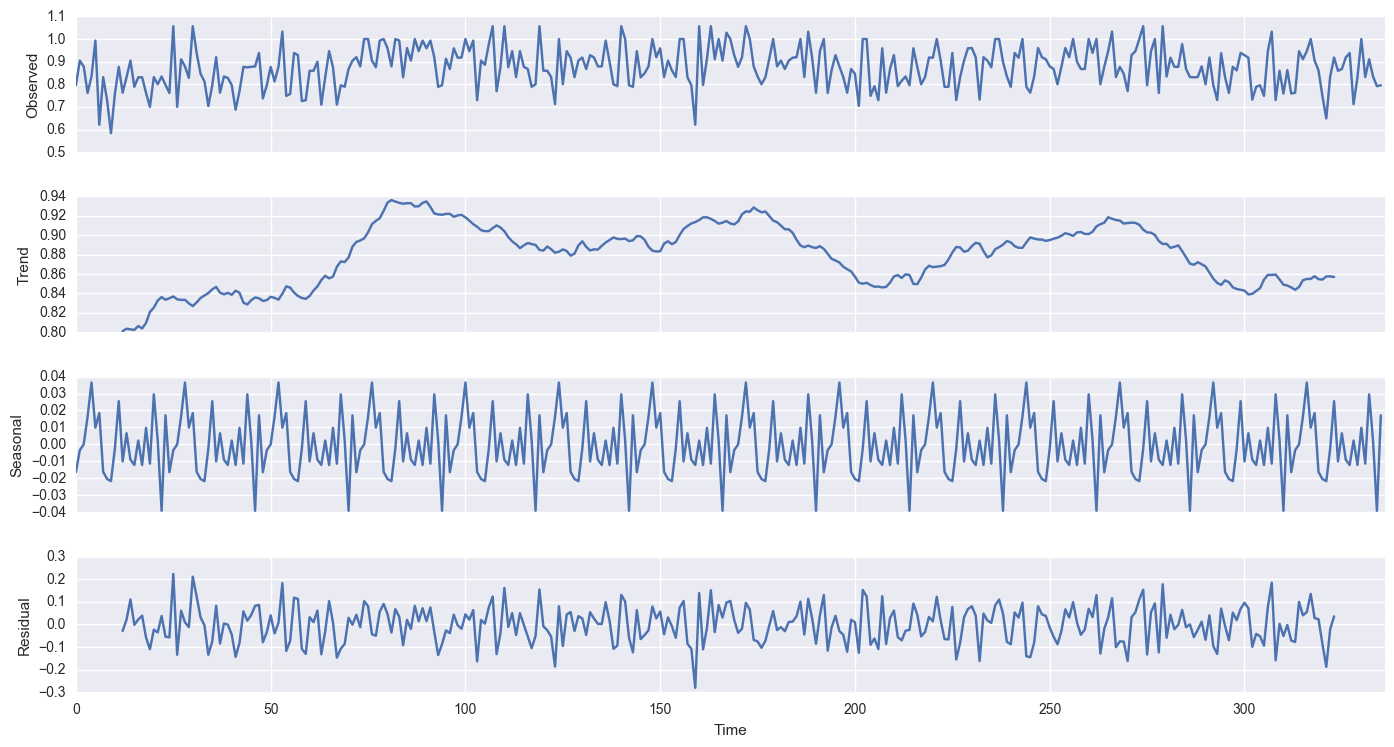

In [13]:
decomposition = seasonal_decompose(ent_calc_df1['In_degree_entropy'].values,freq=24)  
  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

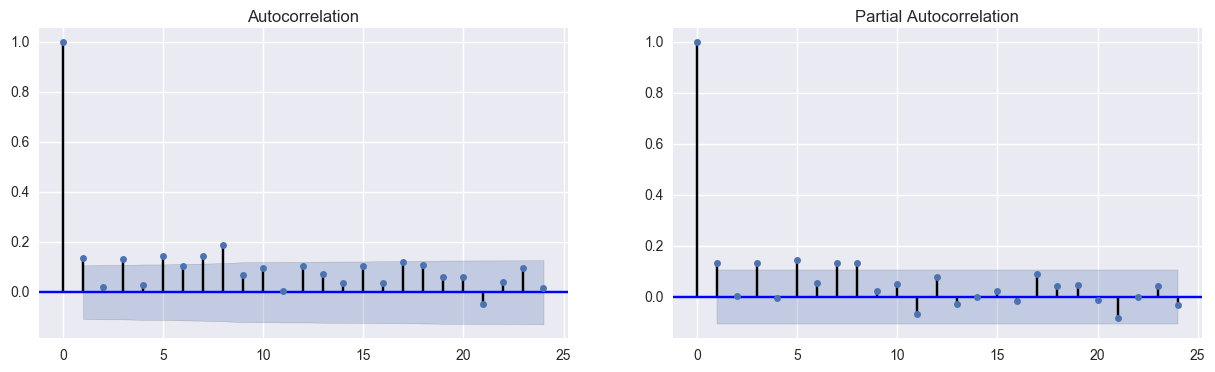

In [14]:
# Graph data
fig, axes = plt.subplots(1, 2, figsize=(15,4))

fig = sm.graphics.tsa.plot_acf(ent_calc_df1['In_degree_entropy'], lags=24, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(ent_calc_df1['In_degree_entropy'], lags=24, ax=axes[1])

If time_varying_reg is True then mle_reg must be False (see SARIMAX notes) 
exog=p53_ts['bytes_mean'], time_varying_regression=False, mle_regression=True)
mod.fit(trend=c)  This is the constant (i.e., intercept)  but so is...
SARIMAX(..... trend='c'). This puts the intercept in the table below and changes the coeff's but not the forecast.
It appears that the add_constant function enables you to calculate an intercept as part of the dynamic regressors
 in the exog regressor set.
168 Hours in a Week.  672(4 Wks) - 168(1 Wk) = 504 Hours(i.e., 3 Weeks for Model Fit). 168 is the Holdout Sample
Needed to add the "enforce_" parameters since incrementing the AR parm to 4 was causing error messages
These some additional parameters when subsetting with the index
  (p53_ts['count'].ix[0:672], enforce_stationarity=False,enforce_invertibility=False,

,enforce_stationarity=False,enforce_invertibility=False
,exog=(p53_ts['bytes_mean']))    
,exog=(exog2)
    
mod = sm.tsa.statespace.SARIMAX(p53_ts['count'],trend='n',order=(2,0,5),seasonal_order=(3,0,0,24)

In [15]:
## Default for the CI is 95%.  St in the Alpha parameter
mod = sm.tsa.statespace.SARIMAX(ent_calc_df1['In_degree_entropy'], 
         order=(9,1,0), seasonal_order=(2,0,0,6))
mod1 = sm.tsa.statespace.SARIMAX(ent_calc_df1['In_degree_entropy'], 
      order=(8,0,0), seasonal_order=(2,0,0,6))
mod2 = sm.tsa.statespace.SARIMAX(ent_calc_df1['In_degree_entropy'], 
     trend='n', order=(1,0,0), seasonal_order=(2,0,0,24))
results = mod.fit()
print(results.summary())                                

/Users/swe03/anaconda/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                
Dep. Variable:                 In_degree_entropy   No. Observations:                  336
Model:             SARIMAX(9, 1, 0)x(2, 0, 0, 6)   Log Likelihood                 342.124
Date:                           Tue, 02 May 2017   AIC                           -660.248
Time:                                   17:20:18   BIC                           -614.443
Sample:                               02-05-2017   HQIC                          -641.989
                                    - 02-18-2017                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8888      0.053    -16.758      0.000      -0.993      -0.785
ar.L2         -0.9371      0.070    -13.311

/Users/swe03/anaconda/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [16]:
# This is just a SARIMAX Results Wrapper.  It collects the model parameters for later use.
res = mod.filter(results.params)

In [17]:
predict_res = res.predict(alpha=0.05, start=337, end=338, dynamic=5)
#predict_res = res.predict()
print(predict_res)

2017-02-19 01:00:00    0.871998
2017-02-19 02:00:00    0.860021
Freq: H, dtype: float64


/Users/swe03/anaconda/lib/python3.5/site-packages/statsmodels/tsa/statespace/kalman_filter.py:1720: ValueWarning: Dynamic prediction specified to begin after the end of prediction, and so has no effect.
  ' prediction, and so has no effect.', ValueWarning)


In [18]:
# In-sample one-step-ahead predictions
predict = res.get_prediction(start=337, end=338)
predict_ci = predict.conf_int()
predict_ci

,lower In_degree_entropy,upper In_degree_entropy
2017-02-19 01:00:00,0.700678,1.043318
2017-02-19 02:00:00,0.688592,1.031450


In [19]:
#predict.predicted_mean

In [20]:
#predict_dy.predicted_mean.astype(int)
predict.predicted_mean.ix[1] 

0.86002078427469852

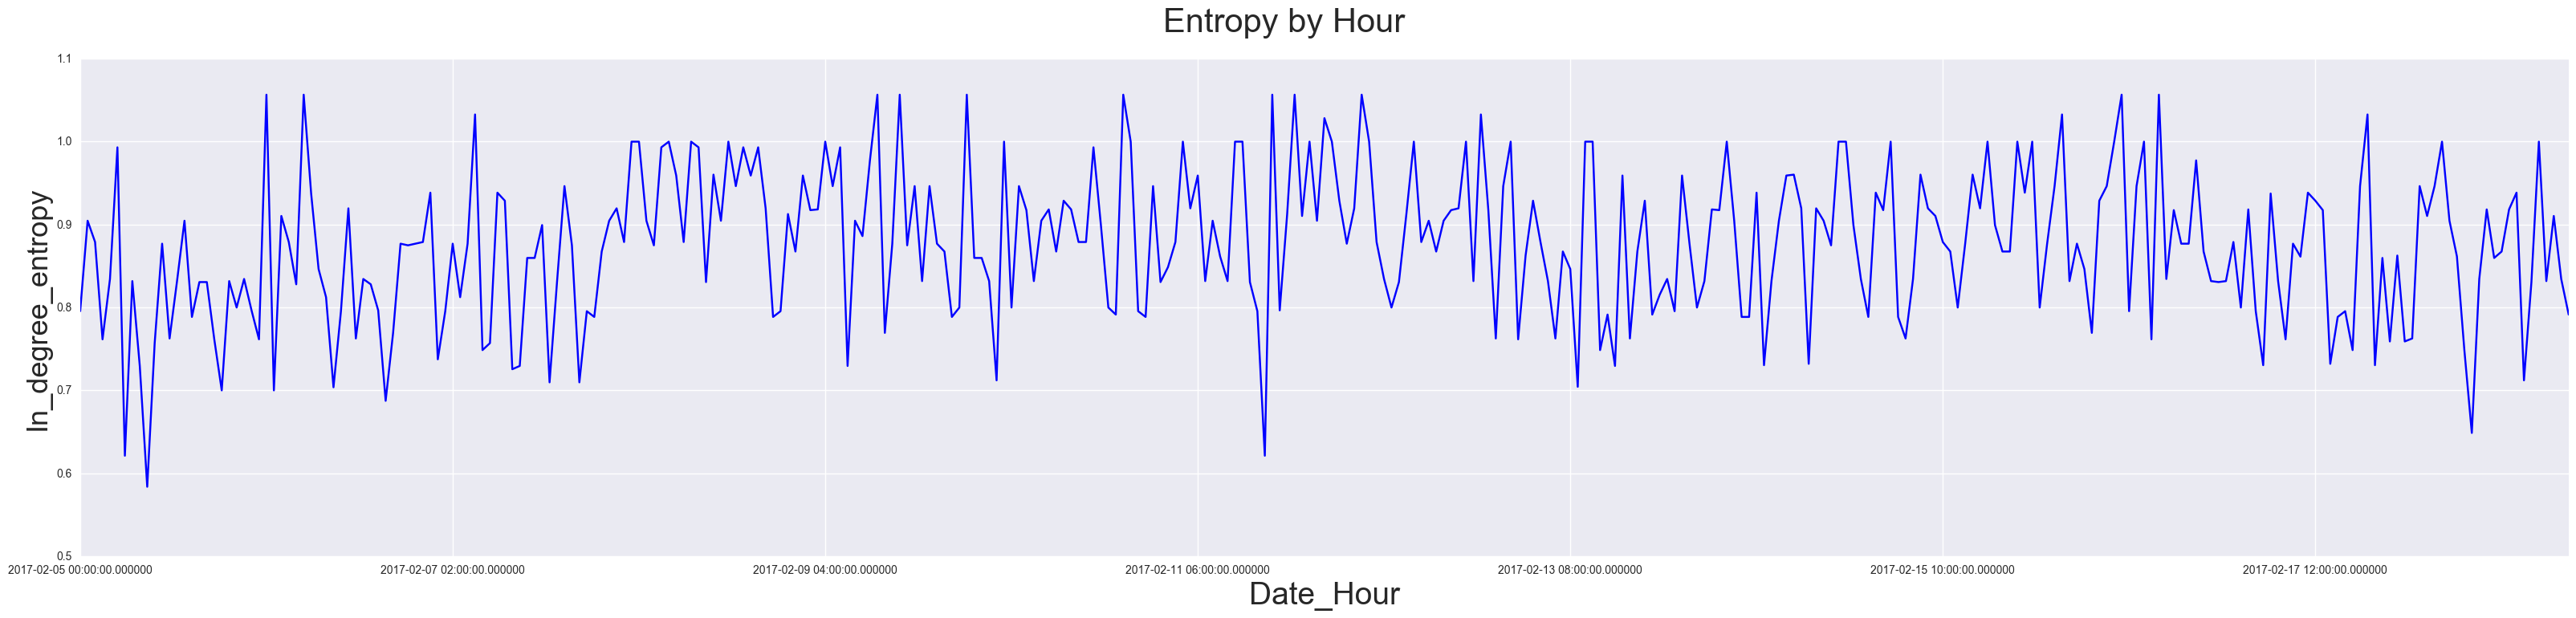

In [21]:
## This is all controlled with the code block above:
# Dynamic predictions
#predict_dy = res.get_prediction()

# Graph
fig, ax = plt.subplots(figsize=(40,8))
npre = 4
#ax.set(title='Count of Packets by Hour', xlabel='Hour', ylabel='Count')
fig.suptitle('Entropy by Hour', fontsize=30)
plt.xlabel('', fontsize=28)   # The fontsize here is applied to the df variable name not the label in the function
plt.ylabel('In_degree_entropy', fontsize=26)

# Plot data points
ent_calc_df1.ix['2017-02-05 00:00:00':'2017-02-18 23:00:00','In_degree_entropy'].plot(ax=ax, style='blue', label='Observed')  # 650 is '12.17.2016 02:00:00'

# Plot predictions
#predict.predicted_mean.ix['2017-02-19 01:00:00':'2017-02-19 02:00:00'].plot(ax=ax, style='r', label='Dynamic forecast', fontsize=30)
#ci = predict_dy_ci.ix['2017-02-01 00:00:00':'2017-02-02 23:00:00']
#ax.fill_between(ci.index, ci.ix[:,0], ci.ix[:,1], color='black', alpha=0.2)

#legend = ax.legend(loc='lower right', fontsize=30)

In [22]:
## Values are between 0 and 4.  Values close to 2: no Serial Correlation. Close to 0: Pos Corr. Close to 4: Neg Corr.
sm.stats.durbin_watson(results.resid.values)

1.7450383814997856

In [23]:
## This df is used below 
resid1 = results.resid

In [24]:
#If the p-val is very small, it means it is unlikely that the data came from a normal distribution
stats.normaltest(resid1)

NormaltestResult(statistic=151.09185069799878, pvalue=1.5517490588522592e-33)

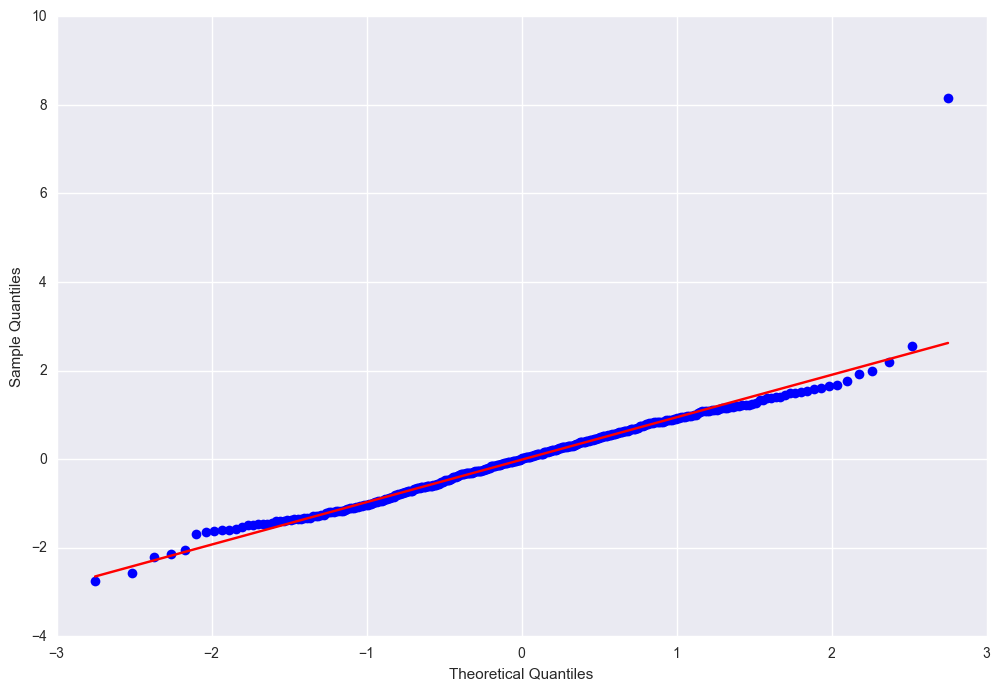

In [25]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid1, line='q', ax=ax, fit=True)

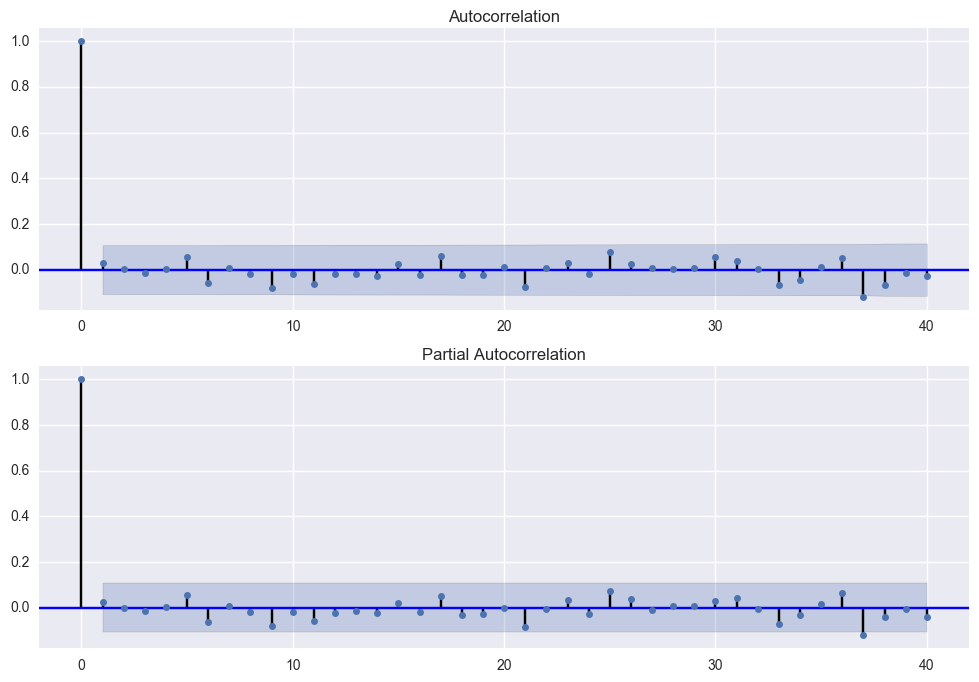

In [26]:
# Graph the acf and pacf for the Residuals
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid1.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid1, lags=40, ax=ax2)

In [27]:
# Box-Pierce Q statistic tests the Null Ho that *ALL* correlations up to Lag K are equal to Zero.  This is not the 
# same as the correlogram above.
r,q,p = sm.tsa.acf(resid1.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC          Q  Prob(>Q)
lag                                
1.0   0.026888   0.245093  0.620551
2.0   0.001186   0.245572  0.884453
3.0  -0.013252   0.305463  0.958998
4.0   0.002420   0.307467  0.989327
5.0   0.055260   1.355203  0.929150
6.0  -0.059479   2.572702  0.860244
7.0   0.005369   2.582651  0.920746
8.0  -0.018994   2.707572  0.951349
9.0  -0.078622   4.854422  0.846809
10.0 -0.019315   4.984384  0.892219
11.0 -0.064779   6.450729  0.841663
12.0 -0.020444   6.597231  0.883043
13.0 -0.018306   6.715054  0.916233
14.0 -0.027079   6.973669  0.935722
15.0  0.024686   7.189268  0.952183
16.0 -0.024285   7.398572  0.964793
17.0  0.057569   8.578448  0.952566
18.0 -0.023315   8.772576  0.964780
19.0 -0.022651   8.956382  0.974197
20.0  0.011890   9.007191  0.982824
21.0 -0.077978  11.199441  0.958761
22.0  0.006840  11.216362  0.971524
23.0  0.029749  11.537475  0.977005
24.0 -0.018631  11.663822  0.983437
25.0  0.076239  13.786345  0.965330
26.0  0.022521  13.972159  0

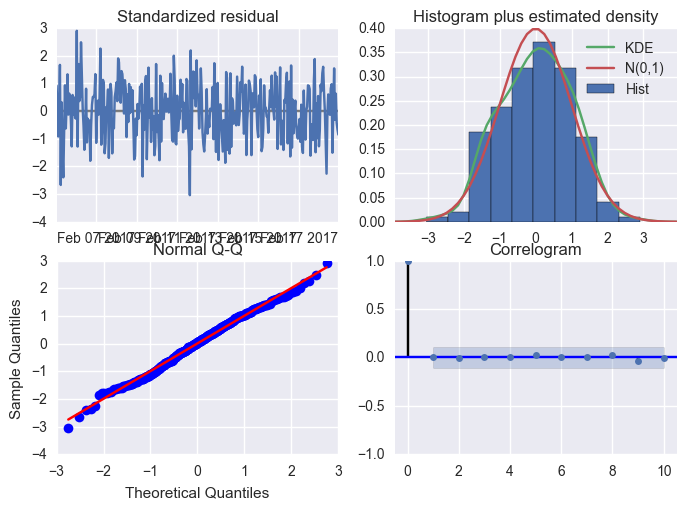

In [28]:
fig = results.plot_diagnostics()

In [29]:
#ci.ix[:,0]  # This is a series. It is the "lower count" text cell
#ci.ix[:,1]   # This is a series.  It is the "upper count" text cell
#ci.ix[:]      # This displays both display cells "lower count"|"upper count"
predict_ci.index

DatetimeIndex(['2017-02-19 01:00:00', '2017-02-19 02:00:00'], dtype='datetime64[ns]', freq='H')

In [30]:
predict_ci.info

<bound method DataFrame.info of                      lower In_degree_entropy  upper In_degree_entropy
2017-02-19 01:00:00                 0.700678                 1.043318
2017-02-19 02:00:00                 0.688592                 1.031450>

In [31]:
predict_ci.ix[:,0]

2017-02-19 01:00:00    0.700678
2017-02-19 02:00:00    0.688592
Freq: H, Name: lower In_degree_entropy, dtype: float64

In [32]:
predict_ci.ix[:,1]

2017-02-19 01:00:00    1.043318
2017-02-19 02:00:00    1.031450
Freq: H, Name: upper In_degree_entropy, dtype: float64

In [33]:
predict_ci.ix[1,1]

1.0314499574021618